# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/MyDrive/datasci/datasci3_2ndSem/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
419,3,129,64,29,115,26.4,0.219,28,1
213,0,140,65,26,130,42.6,0.431,24,1
61,8,133,72,0,0,32.9,0.270,39,1
276,7,106,60,24,0,26.5,0.296,29,1
390,1,100,66,29,196,32.0,0.444,42,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                108       
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 12ms/step - loss: 0.8185 - accuracy: 0.5260 - val_loss: 0.8096 - val_accuracy: 0.5365
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7584 - accuracy: 0.5833 - val_loss: 0.7559 - val_accuracy: 0.5729
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.7114 - accuracy: 0.6319 - val_loss: 0.7133 - val_accuracy: 0.6146
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.6597 - val_loss: 0.6799 - val_accuracy: 0.6302
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6453 - accuracy: 0.6892 - val_loss: 0.6533 - val_accuracy: 0.6354
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6220 - accuracy: 0.7031 - val_loss: 0.6317 - val_accuracy: 0.6562
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6032 - accuracy: 0.7031 - val_loss: 0.6140 - val_accuracy: 0.6667
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.57915866],
       [0.72407186],
       [0.34399095],
       [0.3569451 ],
       [0.17993133],
       [0.5288786 ],
       [0.03124848],
       [0.4644718 ],
       [0.8811901 ],
       [0.13684602]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name, titles):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title=titles.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])


Evaluate the model performance and plot the ROC CURVE

accuracy is 0.781
roc-auc is 0.828


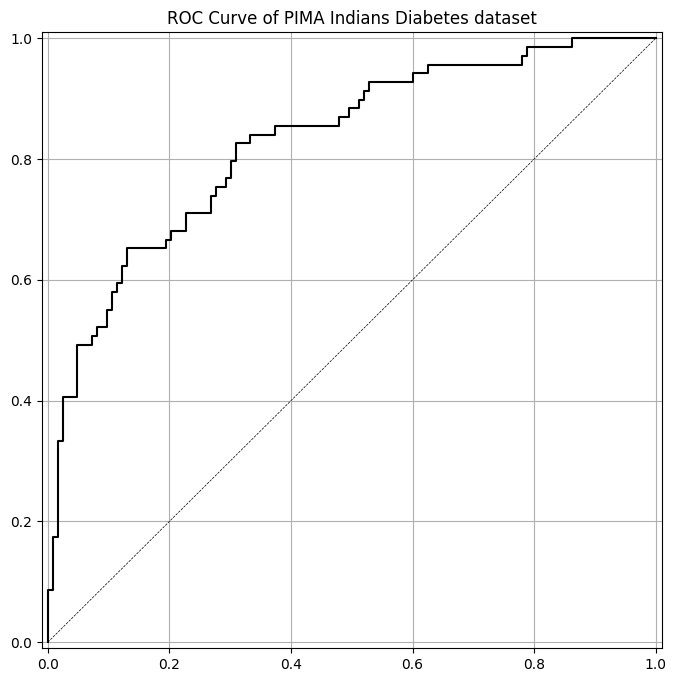

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN', "ROC Curve of PIMA Indians Diabetes dataset")

***From the graph above I can observe that the area under the curve has a high value of accuracy but is not high enough to predict consistent accurate predictions.***

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

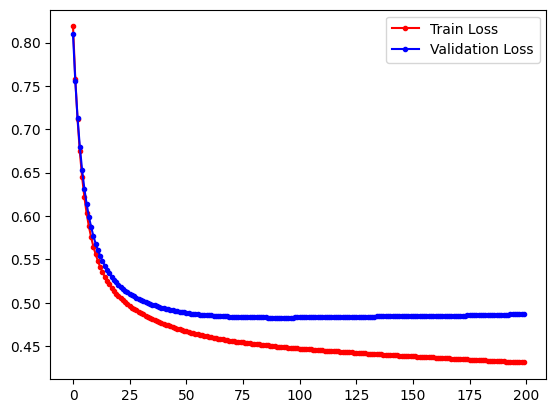

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

***The result of the losses are somewhat good, but not good enough to use because the loss became a plateau at 50% below on the validation loss which is still a big error in the model.***

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
## Own Dataset
df = pd.read_csv("/content/drive/MyDrive/datasci/datasci3_2ndSem/apple_quality.csv",
                 skipinitialspace=True)
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
df.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [ ]:
## remove all null values from the dataset
df.dropna(inplace=True)
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
le = LabelEncoder()
df["Quality"] = le.fit_transform(df["Quality"])

In [ ]:
X = df.iloc[:, :-1].values
y = df["Quality"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
## Build a model with two hidden layers, each with 6 nodes
## Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
new_model = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(6, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation="sigmoid")
])

In [ ]:
## Use a learning rate of .003 and train for 1500 epochs
new_model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
hist = new_model.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), epochs=1500)

Epoch 1/1500
100/100 [==============================] - 1s 4ms/step - loss: 0.7804 - accuracy: 0.5078 - val_loss: 0.7428 - val_accuracy: 0.5050
Epoch 2/1500
100/100 [==============================] - 0s 3ms/step - loss: 0.7194 - accuracy: 0.5106 - val_loss: 0.7054 - val_accuracy: 0.5263
Epoch 3/1500
100/100 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5281 - val_loss: 0.6883 - val_accuracy: 0.5437
Epoch 4/1500
100/100 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5416 - val_loss: 0.6788 - val_accuracy: 0.5612
Epoch 5/1500
100/100 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.5647 - val_loss: 0.6726 - val_accuracy: 0.5750
Epoch 6/1500
100/100 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.5825 - val_loss: 0.6674 - val_accuracy: 0.5987
Epoch 7/1500
100/100 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6059 - val_loss: 0.6628 - val_accuracy:

In [ ]:
y_pred_class = (new_model.predict(X_test_scale) > 0.5).astype("int32")
y_pred_prob = new_model.predict(X_test_scale)

25/25 [==============================] - 0s 1ms/step


In [ ]:
print(f"accuracy is {accuracy_score(y_test,y_pred_class):.3f}")
print(f"roc-auc is {roc_auc_score(y_test,y_pred_prob):.3f}")

accuracy is 0.919
roc-auc is 0.974


In [ ]:
## Graph the trajectory of the loss functions, accuracy on both train and test set
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<Figure size 1000x600 with 0 Axes>

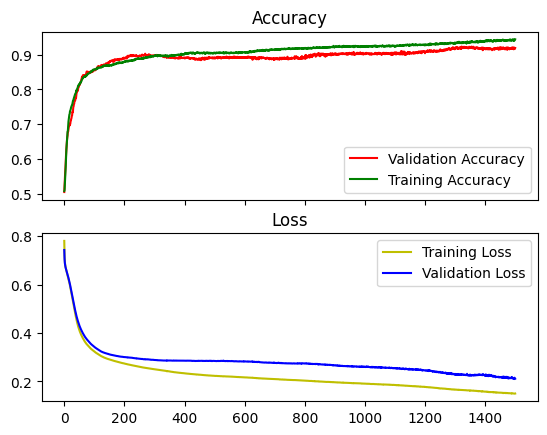

In [ ]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(hist.history["val_accuracy"],'r', label="Validation Accuracy")
ax[0].plot(hist.history["accuracy"],'g', label="Training Accuracy")
ax[0].set_title("Accuracy")

ax[1].plot(hist.history["loss"],'y', label="Training Loss")
ax[1].plot(hist.history["val_loss"],'b', label="Validation Loss")
ax[1].set_title("Loss")

ax[0].legend()
ax[1].legend()

***Based on the graph we can see that the accuracy of the model increases as the epoch increases; as the epoch increases the loss deacreases. The training accuracy being almost in line with the validation accuracy would mean that the training accuary has a good performance.***

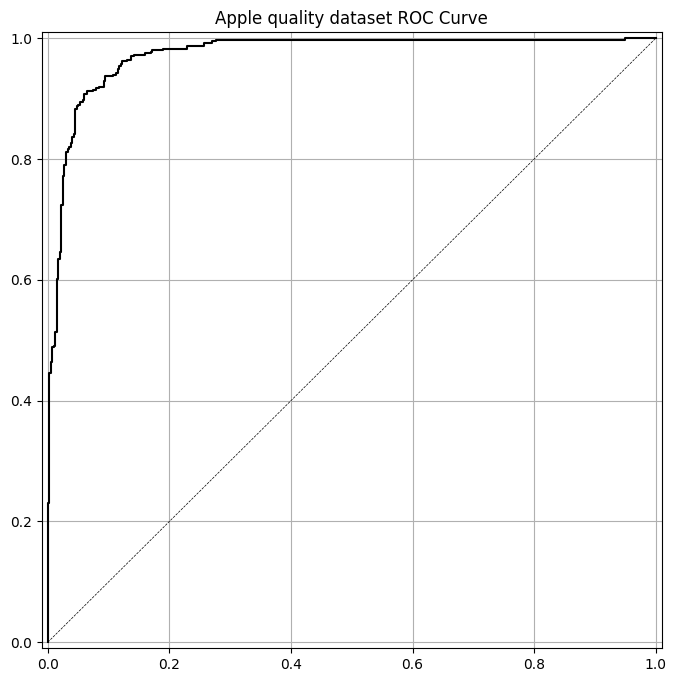

In [ ]:
## Plot the roc curve for the predictions
plot_roc(y_test, y_pred_prob, 'NN', "Apple quality dataset ROC Curve")

***The graph showd a high roc curve which is observable by the area under the curve being big, the curve yielded at 97% which is a good roc score indicating a good performance on the model.***

In [ ]:
##Use different learning rates, numbers of epochs, and network structures.

new_model_2 = Sequential([
    Dense(10, input_shape=(8,), activation="relu"),
    Dense(6, activation='tanh'),
    Dense(1, activation="sigmoid")
])

In [ ]:
rates = 0.001
epoch = 500

new_model_2.compile(RMSprop(learning_rate = rates), "binary_crossentropy", metrics=["accuracy"])
hist_2 = new_model_2.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), epochs= epoch)

y_pred_class_nn = (new_model_2.predict(X_test_scale) > 0.5).astype("int32")
y_pred_prob_nn = new_model_2.predict(X_test_scale)


Epoch 1/500
100/100 [==============================] - 1s 3ms/step - loss: 0.6881 - accuracy: 0.5434 - val_loss: 0.6406 - val_accuracy: 0.6313
Epoch 2/500
100/100 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.6759 - val_loss: 0.5849 - val_accuracy: 0.7025
Epoch 3/500
100/100 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7259 - val_loss: 0.5419 - val_accuracy: 0.7525
Epoch 4/500
100/100 [==============================] - 0s 2ms/step - loss: 0.5298 - accuracy: 0.7513 - val_loss: 0.5084 - val_accuracy: 0.7725
Epoch 5/500
100/100 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.7641 - val_loss: 0.4818 - val_accuracy: 0.7825
Epoch 6/500
100/100 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7775 - val_loss: 0.4611 - val_accuracy: 0.7887
Epoch 7/500
100/100 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.7869 - val_loss: 0.4456 - val_accuracy: 0.7912

In [ ]:
print(f"Learning rate: {rates}, Epoch: {epoch}")
print(f"Accuracy is {accuracy_score(y_test,y_pred_class_nn):.3f}")
print(f"ROC-AUC is {roc_auc_score(y_test,y_pred_prob_nn):.3f}\n")

Learning rate: 0.001, Epoch: 500
Accuracy is 0.938
ROC-AUC is 0.981



<Figure size 1500x900 with 0 Axes>

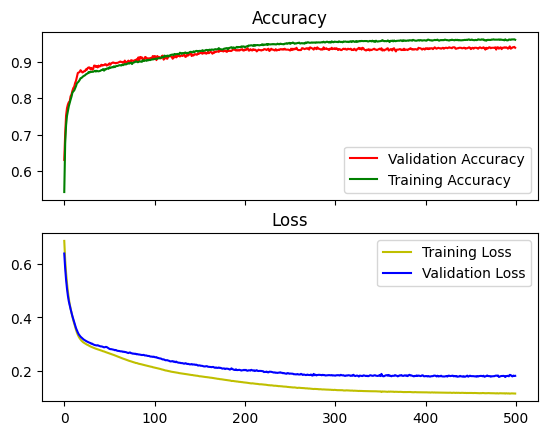

In [ ]:
plt.figure(figsize=(15, 9))
fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(hist_2.history["val_accuracy"],'r', label="Validation Accuracy")
ax[0].plot(hist_2.history["accuracy"],'g', label="Training Accuracy")
ax[0].set_title("Accuracy")

ax[1].plot(hist_2.history["loss"],'y', label="Training Loss")
ax[1].plot(hist_2.history["val_loss"],'b', label="Validation Loss")
ax[1].set_title("Loss")

ax[0].legend()
ax[1].legend()

***We can observe training accuracy showed a closeness with the line of the validation accuracy, which would indicate that the model has a high performance, this will lead to the model predicting accurate results most of the time. Loss is also observed being low, indicating that there are few errors observed when training the model.***

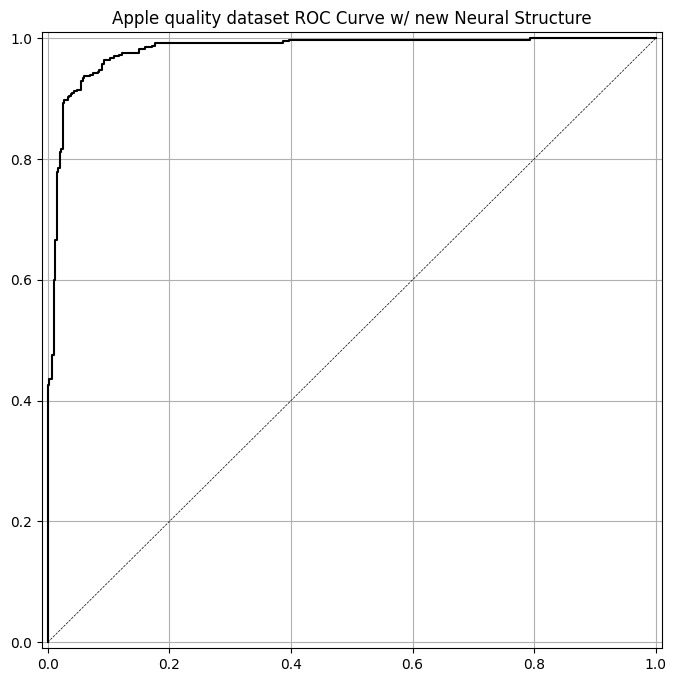

In [ ]:
plot_roc(y_test, y_pred_prob_nn, 'NN', "Apple quality dataset ROC Curve w/ new Neural Structure")

***The area under the curve gave good result being above 90% which is the most acceptable score of a model that has a good perfromace, this is observable on the area under the curve being big.***

#### Conclusion

***During this activity, I learned how to create an artificial neural network using keras, and how to at least interpret loss functions of a model, I also learned how to add layers and what activation functions to use. A neural network accuracy changes based on their structure, some get a better performance by increasing the layers of neurons, some the opposite; with less layers some neural networks perform better than deep neural networks. With epochs increasing, the loss decreases and accuracy of the model is increases, with each epoch the model trains a batch of data which affects the performancew of the model. I still have a lot to learn when it comes to how many nodes do I need and how many hidden layers to add in my neural network, what activation would be best to use in my neural netowrk.***

[Link to Google Colab](https://colab.research.google.com/drive/1fBg4TbMI-T9rIWyiGi9siI_qbZ7Oyr_M?usp=sharing)